In [71]:
import nltk
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,precision_score,f1_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score,cross_val_predict
from sklearn.feature_selection import RFE
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk import FreqDist
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
import os
from afinn import Afinn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
stopword = set(stopwords.words('english'))
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics.classification import classification_report,accuracy_score
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
import textblob
from textblob import TextBlob,Word
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.pipeline import make_pipeline as make_pipeline_imb
import string
from sklearn.pipeline import make_pipeline

In [3]:
train=pd.read_csv('file\\data\\train.csv')

In [4]:
train

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1
...,...,...,...
7269,3343,@mention Google plze Tammi. I'm in middle of ...,1
7270,5334,RT @mention ÷¼ Are you all set? ÷_ {link} ÷...,1
7271,5378,RT @mention Aha! Found proof of lactation room...,1
7272,2173,We just launched our iPad app at #SXSW! Get al...,1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7274 entries, 0 to 7273
Data columns (total 3 columns):
tweet_id     7274 non-null int64
tweet        7273 non-null object
sentiment    7274 non-null int64
dtypes: int64(2), object(1)
memory usage: 170.6+ KB


In [6]:
train.nunique()/len(train)

tweet_id     1.000000
tweet        0.997388
sentiment    0.000550
dtype: float64

In [7]:
train['sentiment'].value_counts()/len(train)

1    0.592659
2    0.327468
0    0.062689
3    0.017184
Name: sentiment, dtype: float64

In [6]:
train['tweet_len']=train['tweet'].map(lambda x: len(str(x)))

In [7]:
train['upper'] = train['tweet'].apply(lambda x: len([str(x) for x in str(x).split() if str(x).isupper()]))

In [8]:
train

,tweet_id,tweet,sentiment,tweet_len,upper
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,89,0
1,1851,Learning ab Google doodles! All doodles should...,1,143,0
2,2689,one of the most in-your-face ex. of stealing t...,2,132,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,125,1
4,3604,Line outside the Apple store in Austin waiting...,1,77,1
...,...,...,...,...,...
7269,3343,@mention Google plze Tammi. I'm in middle of ...,1,93,1
7270,5334,RT @mention ÷¼ Are you all set? ÷_ {link} ÷...,1,91,1
7271,5378,RT @mention Aha! Found proof of lactation room...,1,140,2
7272,2173,We just launched our iPad app at #SXSW! Get al...,1,92,2


In [9]:
train['tweet'] = train['tweet'].apply(lambda x: " ".join(str(x).lower() for x in str(x).split())) #convert tweets to lowercase

In [19]:
a=train.groupby(['sentiment'])['tweet_len'].mean()

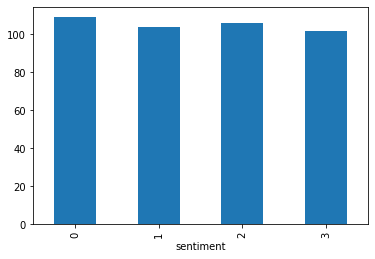

In [20]:
a.plot.bar()

In [ ]:
nouns=len([i[0] for i in nltk.pos_tag(lower_stem_ls) if i[1] in ['NN','NNS','NNP','NNPS']])

In [30]:
b=train['tweet'].map(lambda x: nltk.pos_tag(nouns(str(x))))

In [72]:
b[1]

[('Learning', 'VBG'),
 ('ab', 'JJ'),
 ('Google', 'NNP'),
 ('doodles!', 'NN'),
 ('All', 'NNP'),
 ('doodles', 'NNS'),
 ('should', 'MD'),
 ('be', 'VB'),
 ('light,', 'JJ'),
 ('funny', 'JJ'),
 ('&amp;', 'NNS'),
 ('innovative,', 'VBP'),
 ('with', 'IN'),
 ('exceptions', 'NNS'),
 ('for', 'IN'),
 ('significant', 'JJ'),
 ('occasions.', 'JJ'),
 ('#GoogleDoodle', 'NN'),
 ('#sxsw', 'NN')]

In [10]:
def nouns(s):
    words=s.split()
    return words

In [11]:
def preprocess(s):
    lower_ls=nltk.word_tokenize(s.lower())
    return lower_ls

In [12]:
lower_ls=train['tweet'].map(lambda x: preprocess(str(x)))

In [13]:
train['hashtag_cnt']=lower_ls.map(lambda x: x.count('#'))
train['rt_cnt']=lower_ls.map(lambda x: x.count('rt'))
train['mention_cnt']=lower_ls.map(lambda x: x.count('@'))

In [14]:
train

,tweet_id,tweet,sentiment,tweet_len,upper,hashtag_cnt,rt_cnt,mention_cnt
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,89,0,3,0,0
1,1851,learning ab google doodles! all doodles should...,1,143,0,2,0,0
2,2689,one of the most in-your-face ex. of stealing t...,2,132,2,1,1,1
3,4525,this iphone #sxsw app would b pretty awesome i...,0,125,1,3,0,0
4,3604,line outside the apple store in austin waiting...,1,77,1,1,0,0
...,...,...,...,...,...,...,...,...
7269,3343,@mention google plze tammi. i'm in middle of #...,1,93,1,1,0,1
7270,5334,rt @mention ÷¼ are you all set? ÷_ {link} ÷...,1,91,1,5,1,1
7271,5378,rt @mention aha! found proof of lactation room...,1,140,2,1,1,1
7272,2173,we just launched our ipad app at #sxsw! get al...,1,92,2,1,0,0


In [60]:
train[train['rt_cnt']==3]

,tweet_id,tweet,sentiment,upper,hashtag_cnt,rt_cnt,mention_cnt
591,6419,rt @mention oooorkut? rt @mention rt @mention ...,1,3,1,3,3
1352,6485,rt @mention rt @mention :) rt @mention &quot;g...,2,4,2,3,3
1984,6602,rt @mention rt @mention rt @mention google set...,1,3,2,3,3
2474,6605,rt @mention rt @mention rt @mention news googl...,1,3,2,3,3
2799,6601,rt @mention rt @mention rt @mention #sxsw a li...,1,4,1,3,3
2937,4800,rt rt @mention the ipad 2 takes over #sxsw [vi...,2,5,3,3,2
3723,6003,rt @mention hey #sxsw- ers rt @mention rt @men...,2,5,3,3,3
5012,5387,rt @mention and it will suck. rt @mention rt @...,0,3,1,3,3
6165,6627,rt @mention rt @mention wonder how many ipads ...,1,4,1,3,3


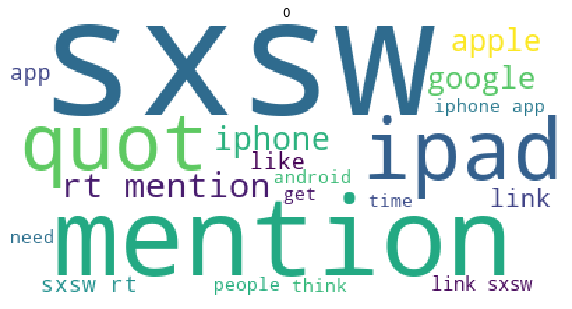

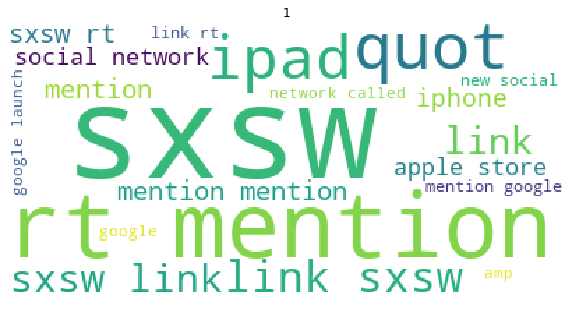

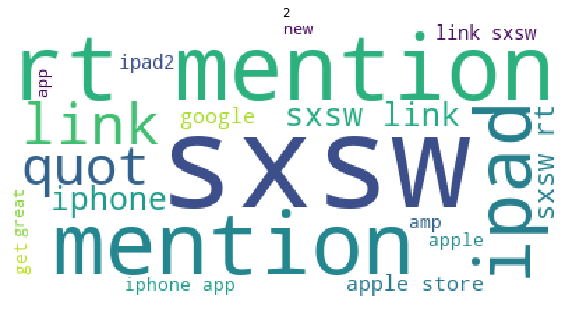

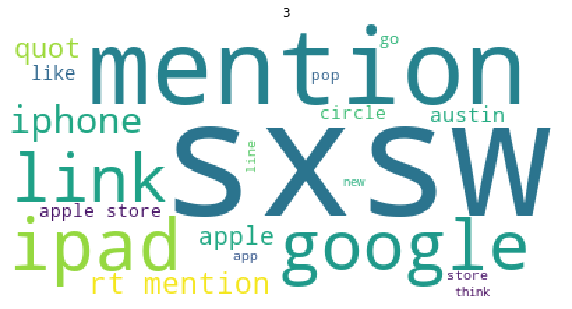

In [41]:
sentiments = [0, 1, 2, 3]
cloud = WordCloud(background_color="white", max_words=20, stopwords=stopwords.words('english'))
def draw_word_clouds(dataframe):
    for i in sentiments:
        category = cloud.generate(dataframe.loc[dataframe['sentiment'] == i, 'tweet'].str.cat(sep='\n'))
        plt.figure(figsize=(10,10))
        plt.imshow(category)
        plt.axis("off")
        plt.title(i)
        plt.show()
draw_word_clouds(train)

In [15]:
tweet_ls = train['tweet'].apply(lambda x: str(x).split())

In [16]:
tweet_ls

0       [#sxswnui, #sxsw, #apple, defining, language, ...
1       [learning, ab, google, doodles!, all, doodles,...
2       [one, of, the, most, in-your-face, ex., of, st...
3       [this, iphone, #sxsw, app, would, b, pretty, a...
4       [line, outside, the, apple, store, in, austin,...
                              ...                        
7269    [@mention, google, plze, tammi., i'm, in, midd...
7270    [rt, @mention, ÷¼, are, you, all, set?, ÷_, ...
7271    [rt, @mention, aha!, found, proof, of, lactati...
7272    [we, just, launched, our, ipad, app, at, #sxsw...
7273    [the, next, fin, serv, battle, is, vs, apple,,...
Name: tweet, Length: 7274, dtype: object

In [17]:
train['total_puncts'] = train['tweet'].map(lambda x: len([char for char in x if char in string.punctuation]))

In [18]:
new_tweet=tweet_ls.map(lambda x: [re.sub('^#\w+','',i) for i in x])

In [19]:
new_tweet=new_tweet.map(lambda x: [re.sub('^@\w+','',i) for i in x])

In [20]:
new_tweet=new_tweet.map(lambda x: [re.sub('rt','',i) for i in x])

In [21]:
new_tweet=new_tweet.map(lambda x: list(filter(None, x)) )

In [22]:
new_tweet_str=new_tweet.map(lambda x: ' '.join(x)) 

In [23]:
train['clean_tweet'] = new_tweet_str.apply(lambda x: re.sub('[^a-z0-9\s]', '', x, flags=re.I|re.M))

In [24]:
train['clean_tweet']

0       defining language of touch with different dial...
1       learning ab google doodles all doodles should ...
2       one of the most inyourface ex of stealing the ...
3       this iphone app would b pretty awesome if it d...
4       line outside the apple store in austin waiting...
                              ...                        
7269    google plze tammi im in middle of craziness an...
7270                               are you all set  link 
7271    aha found proof of lactation room excuse me qu...
7272    we just launched our ipad app at  get all the ...
7273    the next fin serv battle is vs apple goog mobi...
Name: clean_tweet, Length: 7274, dtype: object

In [25]:
tweet_ls = train['clean_tweet'].apply(lambda x: str(x).split())

In [26]:
nouns_ls=tweet_ls.apply(lambda x: [i[0] for i in nltk.pos_tag(x) if i[1] in ['NN','NNS','NNP','NNPS']])

In [27]:
verb_ls=tweet_ls.apply(lambda x: [i[0] for i in nltk.pos_tag(x) if i[1] in ['VB','VBD','VBG','VBN','VBP','VBZ']])

In [28]:
adj_ls=tweet_ls.apply(lambda x: [i[0] for i in nltk.pos_tag(x) if i[1] in ['JJ','JJR','JJS']])

In [29]:
nouns_ls[2]

['ex', 'show', 'quotat', 'apple', 'schools', 'mkt', 'expesquot', 'link']

In [30]:
train['nouns']=nouns_ls.map(lambda x: len(x))

In [31]:
train['verbs']=verb_ls.map(lambda x: len(x))

In [32]:
train['adjectives']=adj_ls.map(lambda x: len(x))

In [33]:
train

,tweet_id,tweet,sentiment,tweet_len,upper,hashtag_cnt,rt_cnt,mention_cnt,total_puncts,clean_tweet,nouns,verbs,adjectives
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,89,0,3,0,0,3,defining language of touch with different dial...,2,2,3
1,1851,learning ab google doodles! all doodles should...,1,143,0,2,0,0,8,learning ab google doodles all doodles should ...,5,3,5
2,2689,one of the most in-your-face ex. of stealing t...,2,132,2,1,1,1,12,one of the most inyourface ex of stealing the ...,8,1,2
3,4525,this iphone #sxsw app would b pretty awesome i...,0,125,1,3,0,0,5,this iphone app would b pretty awesome if it d...,4,3,1
4,3604,line outside the apple store in austin waiting...,1,77,1,1,0,0,3,line outside the apple store in austin waiting...,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7269,3343,@mention google plze tammi. i'm in middle of #...,1,93,1,1,0,1,5,google plze tammi im in middle of craziness an...,7,1,2
7270,5334,rt @mention ÷¼ are you all set? ÷_ {link} ÷...,1,91,1,5,1,1,11,are you all set link,1,2,0
7271,5378,rt @mention aha! found proof of lactation room...,1,140,2,1,1,1,16,aha found proof of lactation room excuse me qu...,7,4,1
7272,2173,we just launched our ipad app at #sxsw! get al...,1,92,2,1,0,0,6,we just launched our ipad app at get all the ...,5,2,2


In [34]:
train.groupby(['sentiment'])['total_puncts'].mean()

sentiment
0    6.302632
1    7.304106
2    6.955080
3    6.352000
Name: total_puncts, dtype: float64

In [35]:
train_new=train.drop(['tweet','tweet_id'],axis=1)

In [36]:
train_new=train_new[train_new['sentiment']!=3]

In [123]:
train_new_0_1=train_new[train_new['sentiment']!=2]

In [164]:
train_new_1_2=train_new[train_new['sentiment']!=0]

In [37]:
train_new.isnull().sum()

sentiment       0
tweet_len       0
upper           0
hashtag_cnt     0
rt_cnt          0
mention_cnt     0
total_puncts    0
clean_tweet     0
nouns           0
verbs           0
adjectives      0
dtype: int64

In [38]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7149 entries, 0 to 7273
Data columns (total 11 columns):
sentiment       7149 non-null int64
tweet_len       7149 non-null int64
upper           7149 non-null int64
hashtag_cnt     7149 non-null int64
rt_cnt          7149 non-null int64
mention_cnt     7149 non-null int64
total_puncts    7149 non-null int64
clean_tweet     7149 non-null object
nouns           7149 non-null int64
verbs           7149 non-null int64
adjectives      7149 non-null int64
dtypes: int64(10), object(1)
memory usage: 670.2+ KB


In [39]:
vect=CountVectorizer(max_features=50)
#X=train_new.drop(['sentiment'],axis=1)
X=train_new['clean_tweet']
y=train_new['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, 
                                    y, train_size = 0.8,random_state=1)

In [181]:
vect=CountVectorizer(max_features=50)
#X=train_new.drop(['sentiment'],axis=1)
X=train_new_0_1['clean_tweet']
y=train_new_0_1['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, 
                                    y, train_size = 0.8,random_state=1)

In [197]:
vect=CountVectorizer(max_features=50)
#X=train_new.drop(['sentiment'],axis=1)
X=train_new_1_2['clean_tweet']
y=train_new_1_2['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, 
                                    y, train_size = 0.8,random_state=1)

In [198]:
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=50, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [199]:
train_vectors = vect.transform(X_train)

test_vectors = vect.transform(X_test)
rf=RandomForestClassifier()
rf.fit(train_vectors,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [200]:
unique,count=np.unique(y_train,return_counts=True)
y_train_dict_value_count={k:v for (k,v) in zip(unique,count)}
y_train_dict_value_count

{1: 3450, 2: 1904}

In [201]:
weights=np.linspace(0.05,1,10) #range(358,3446,500) #np.array(range(358,3446,500))  #np.linspace(0.05,0.25,10)


In [202]:
pipe=make_pipeline_imb(SMOTE(),RandomForestClassifier())

In [203]:
gsc=GridSearchCV(
    estimator=pipe,
    param_grid={'smote__sampling_strategy':weights
    },
    scoring='f1',
    cv=3
)

In [204]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'smote', 'randomforestclassifier', 'smote__k_neighbors', 'smote__n_jobs', 'smote__random_state', 'smote__sampling_strategy', 'randomforestclassifier__bootstrap', 'randomforestclassifier__ccp_alpha', 'randomforestclassifier__class_weight', 'randomforestclassifier__criterion', 'randomforestclassifier__max_depth', 'randomforestclassifier__max_features', 'randomforestclassifier__max_leaf_nodes', 'randomforestclassifier__max_samples', 'randomforestclassifier__min_impurity_decrease', 'randomforestclassifier__min_impurity_split', 'randomforestclassifier__min_samples_leaf', 'randomforestclassifier__min_samples_split', 'randomforestclassifier__min_weight_fraction_leaf', 'randomforestclassifier__n_estimators', 'randomforestclassifier__n_jobs', 'randomforestclassifier__oob_score', 'randomforestclassifier__random_state', 'randomforestclassifier__verbose', 'randomforestclassifier__warm_start'])

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: The specified ratio required to remove samples from the minority class while trying to generate new samples. Please increase the ratio.

  FitFailedWarning)


Best parameters: {'smote__sampling_strategy': 0.5777777777777778}


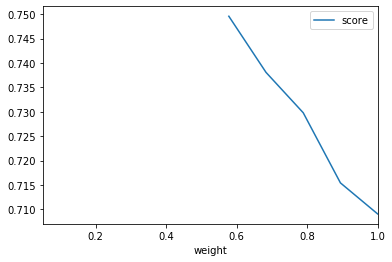

In [205]:
grid_result=gsc.fit(train_vectors,y_train)
print("Best parameters: %s" % grid_result.best_params_)
weight_f1_score_df=pd.DataFrame({'score':grid_result.cv_results_['mean_test_score'],'weight':weights})
weight_f1_score_df.plot(x='weight')

In [206]:
sm=SMOTE(random_state=12, sampling_strategy=0.57)
x_train_res,y_train_res=sm.fit_sample(train_vectors,y_train)

In [207]:
unique,count=np.unique(y_train_res,return_counts=True)
y_train_res_dict_value_count={k:v for (k,v) in zip(unique,count)}
y_train_res_dict_value_count

{1: 3450, 2: 1966}

In [208]:
x_train_res_arr=x_train_res.toarray()

In [193]:
train_res_0_1=pd.DataFrame(x_train_res_arr,y_train_res).reset_index()

In [209]:
train_res_1_2=pd.DataFrame(x_train_res_arr,y_train_res).reset_index()

In [210]:
train_res_1_2

,sentiment,0,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,49
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,2,0,0,1,0,0,0,0,0,0
4,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,2,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
5412,2,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
5413,2,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5414,2,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0


In [196]:
train_res_0=train_res_0_1[train_res_0_1['sentiment']!=1]

In [212]:
train_res_new=pd.concat([train_res_1_2,train_res_0])

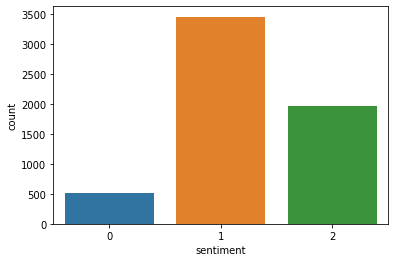

In [213]:
sns.countplot(train_res_new['sentiment'])

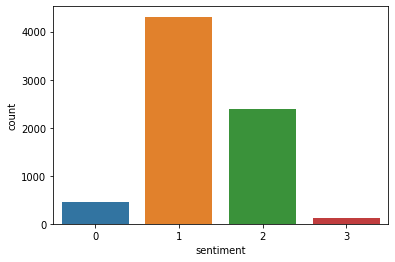

In [214]:
sns.countplot(train['sentiment'])

In [215]:
train['sentiment'].value_counts()/len(train)

1    0.592659
2    0.327468
0    0.062689
3    0.017184
Name: sentiment, dtype: float64

In [216]:
train_res_new['sentiment'].value_counts()/len(train_res_new)

1    0.581493
2    0.331367
0    0.087140
Name: sentiment, dtype: float64

In [218]:
X=train_res_new.drop(['sentiment'],axis=1)
y=train_res_new['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, 
                                    y, train_size = 0.8,random_state=1)

In [219]:
rf.fit(X_train,y_train)

y_pred = cross_val_predict(rf, X_test, y_test, cv=10)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.25      0.32        92
           1       0.68      0.82      0.74       715
           2       0.50      0.37      0.43       380

    accuracy                           0.63      1187
   macro avg       0.54      0.48      0.50      1187
weighted avg       0.61      0.63      0.61      1187



In [148]:
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=50, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [215]:
type(X_test)

pandas.core.series.Series

In [205]:


train_vectors = vect.transform(X_train)

test_vectors = vect.transform(X_test)

rf.fit(train_res_new,y_train)

y_pred = cross_val_predict(rf, test_vectors, y_test, cv=10)

print(classification_report(y_test, y_pred))

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.20      0.07      0.11        84
           1       0.66      0.80      0.72       901
           2       0.43      0.31      0.36       445
           3       0.00      0.00      0.00        25

    accuracy                           0.60      1455
   macro avg       0.32      0.30      0.30      1455
weighted avg       0.55      0.60      0.56      1455



In [206]:
test_vectors

<1455x50 sparse matrix of type '<class 'numpy.int64'>'
	with 8527 stored elements in Compressed Sparse Row format>

In [220]:
test=pd.read_csv('file\\data\\test.csv')

In [221]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1819 entries, 0 to 1818
Data columns (total 2 columns):
tweet_id    1819 non-null int64
tweet       1819 non-null object
dtypes: int64(1), object(1)
memory usage: 28.5+ KB


In [222]:
tweet_ls_test = test['tweet'].apply(lambda x: str(x).split())

In [223]:
new_tweet_ls=tweet_ls_test.map(lambda x: [re.sub('^#\w+','',i) for i in x])

new_tweet_ls=new_tweet_ls.map(lambda x: [re.sub('^@\w+','',i) for i in x])

new_tweet_ls=new_tweet_ls.map(lambda x: [re.sub('rt','',i) for i in x])

new_tweet_ls=new_tweet_ls.map(lambda x: list(filter(None, x)) )

new_tweet_str_test=new_tweet_ls.map(lambda x: ' '.join(x)) 

test['clean_tweet'] = new_tweet_str_test.apply(lambda x: re.sub('[^a-z0-9\s]', '', x, flags=re.I|re.M))


In [224]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1819 entries, 0 to 1818
Data columns (total 3 columns):
tweet_id       1819 non-null int64
tweet          1819 non-null object
clean_tweet    1819 non-null object
dtypes: int64(1), object(2)
memory usage: 42.8+ KB


In [225]:
test.drop(['tweet_id','tweet'],inplace=True,axis=1)

In [226]:
test=test['clean_tweet']

In [227]:
test_vectors = vect.transform(test)

In [228]:
test_vectors

<1819x50 sparse matrix of type '<class 'numpy.int64'>'
	with 10318 stored elements in Compressed Sparse Row format>

In [229]:
y_pred = rf.predict(test_vectors)

In [230]:
len(y_pred)

1819

In [231]:
sub_csv = pd.read_csv('file\\data\\sample_submission.csv')

In [232]:
sub_csv['sentiment']=y_pred

In [233]:
sub_csv.to_csv('result2.csv',index=False)